In [1]:
!pip install -U tensorflow_datasets

    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [3]:
#importing Tensorflow library
import tensorflow as tf 

In [6]:
#Importing Tensorflow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [7]:
#importing HElper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [9]:
#Here I am importing MNIST DATASET 
#You can download it from https://github.com/zalandoresearch/fashion-mnist


In [11]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [13]:
#From features we are taking labels of metadata and printing it 
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [15]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [17]:
#Preprocessing the data
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images,labels

#The map function applies the normalize function to each element in thetraine 
#and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()


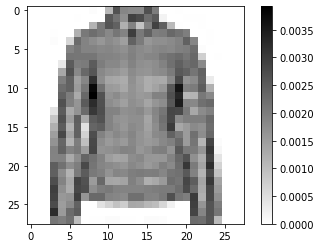

In [18]:
#Now taking a loook how our image looks like

for image, label in test_dataset.take(2):
  break
image = image.numpy().reshape((28,28))

#plot the image -voila a piece of fashion clothing

plt.figure()
plt.imshow(image,cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
 

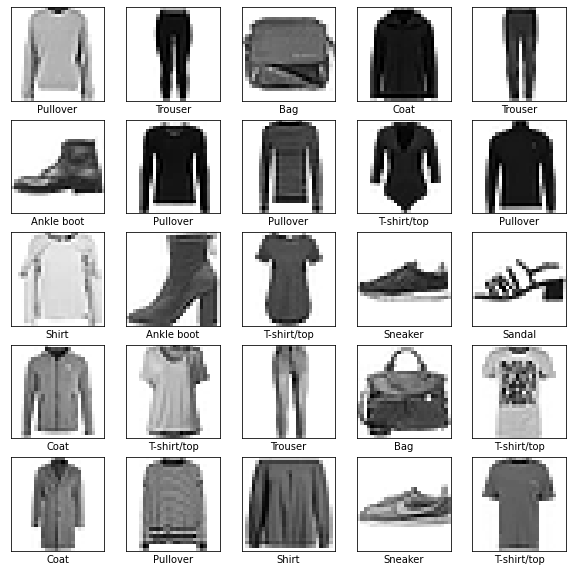

In [19]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [23]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 18s 3ms/step - loss: 1.1065 - accuracy: 0.6578
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6485 - accuracy: 0.7687
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5721 - accuracy: 0.7941
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5320 - accuracy: 0.8115
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4978 - accuracy: 0.8250


In [25]:
#Evaluationg accuracy of the trained model
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.5158 - accuracy: 0.8124
Accuracy on test dataset: 0.8123999834060669


In [26]:
#making predictions
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [27]:
predictions.shape

(32, 10)

In [28]:
predictions[0]

array([4.35339869e-04, 4.39335039e-04, 1.48261741e-01, 1.57345654e-04,
       7.27288067e-01, 4.12352932e-07, 1.20745376e-01, 2.80804979e-09,
       2.67238496e-03, 6.54116690e-08], dtype=float32)

In [29]:
np.argmax(predictions[0])

4

In [30]:
test_labels[0]

4

In [31]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

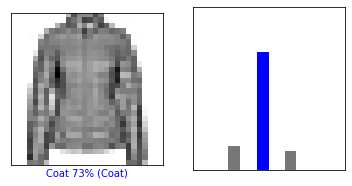

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

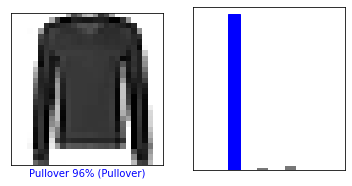

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)


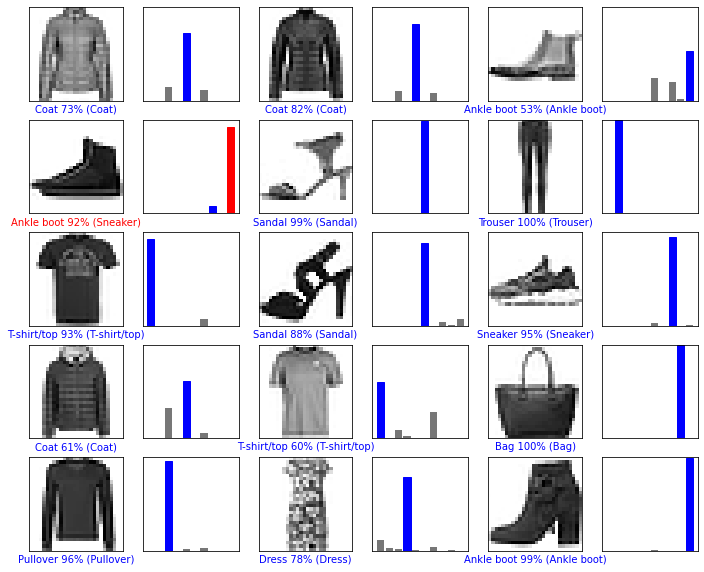

In [34]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [35]:
# Grabing an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [36]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [37]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.35339607e-04 4.39334748e-04 1.48261756e-01 1.57345770e-04
  7.27287948e-01 4.12351284e-07 1.20745435e-01 2.80804935e-09
  2.67238449e-03 6.54116619e-08]]


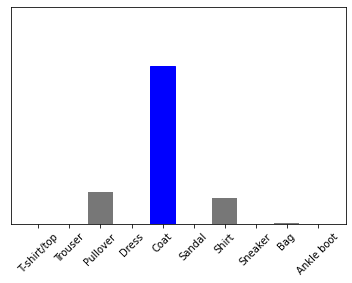

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [39]:
np.argmax(predictions_single[0])

4